In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import precision_score, recall_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('mp.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
print(df.isnull().sum())

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df = df.drop(['customerID'], axis=1)

In [9]:
df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [10]:
num_col_list = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
    if col not in num_col_list:
      print(col,df[col].unique())
      print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [12]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

ValueError: could not convert string to float: ' '

In [13]:
len(df[df["TotalCharges"] == " "])

11

In [14]:
df[df["TotalCharges"] == " "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
df["TotalCharges"] = df["TotalCharges"].replace(" ",0)

In [16]:
df[df["TotalCharges"] == 0]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,0,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,0,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,0,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,0,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,0,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,0,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,0,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,0,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,0,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,0,No


In [17]:
df["TotalCharges"] = df["TotalCharges"].astype(float)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


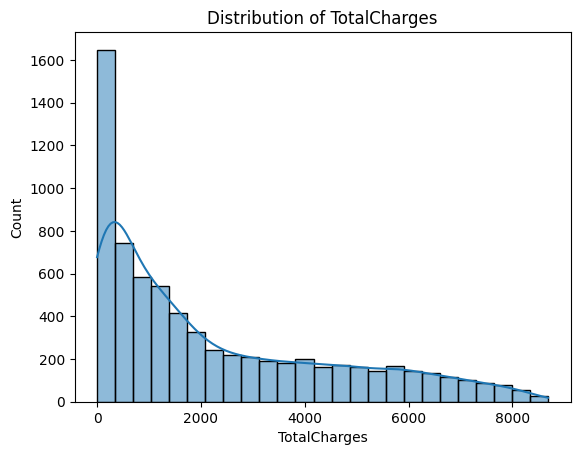

In [19]:
sns.histplot(df["TotalCharges"],kde=True)
plt.title("Distribution of TotalCharges")
plt.show()

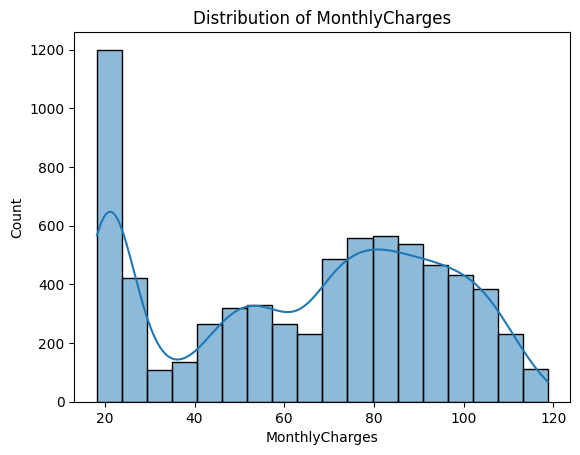

In [20]:
sns.histplot(df["MonthlyCharges"],kde=True)
plt.title("Distribution of MonthlyCharges")
plt.show()

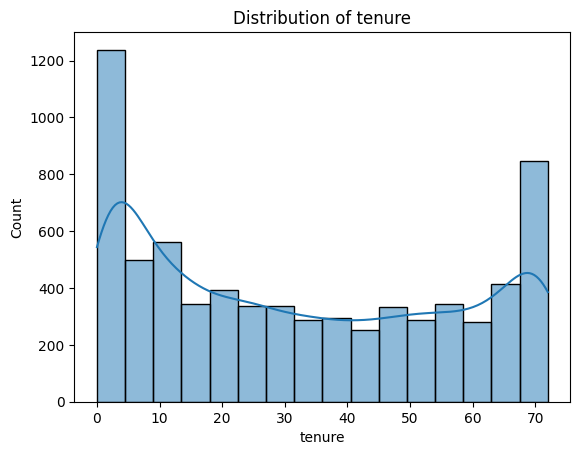

In [21]:
sns.histplot(df["tenure"],kde=True)
plt.title("Distribution of tenure")
plt.show()

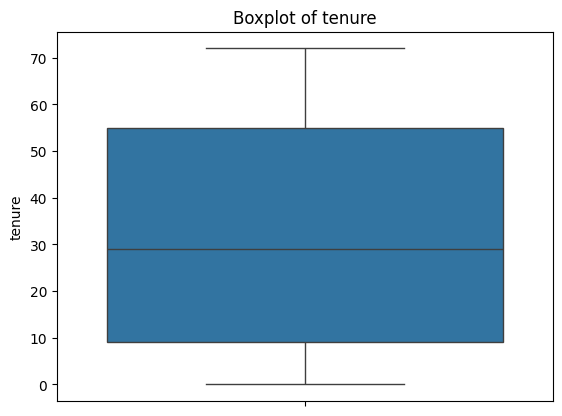

In [22]:
sns.boxplot(df["tenure"])
plt.title("Boxplot of tenure")
plt.show()

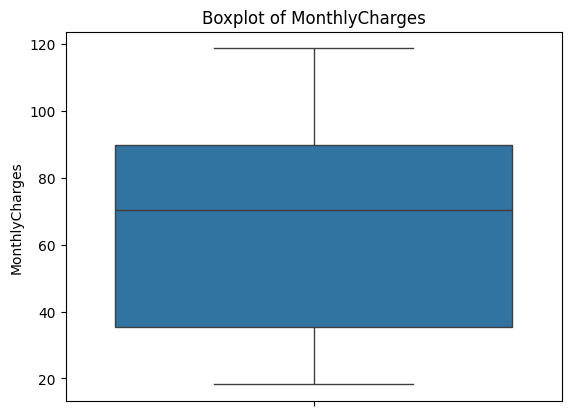

In [23]:
sns.boxplot(df["MonthlyCharges"])
plt.title("Boxplot of MonthlyCharges")
plt.show()

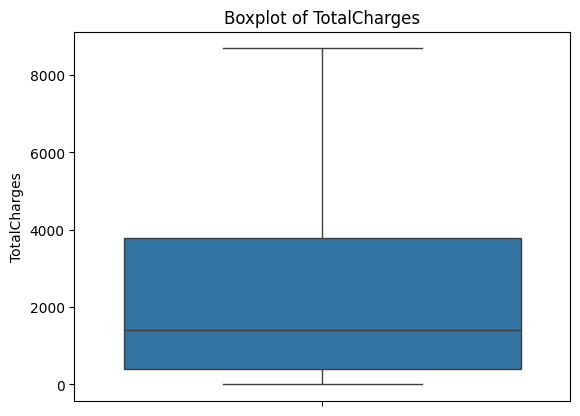

In [24]:
sns.boxplot(df["TotalCharges"])
plt.title("Boxplot of TotalCharges")
plt.show()

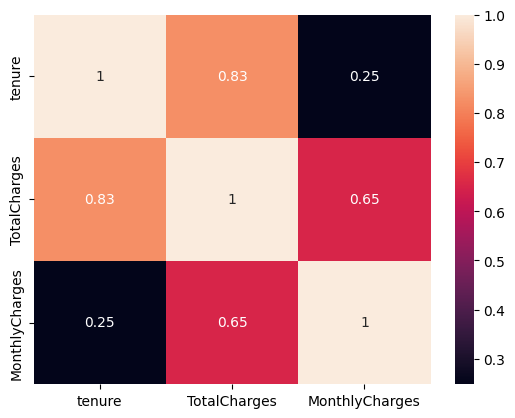

In [25]:
sns.heatmap(df[["tenure","TotalCharges","MonthlyCharges"]].corr(),annot=True)
plt.show()

In [26]:
obj_cols = df.select_dtypes(include="object").columns.to_list()
obj_cols = obj_cols + ["SeniorCitizen"]
print(obj_cols)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn', 'SeniorCitizen']


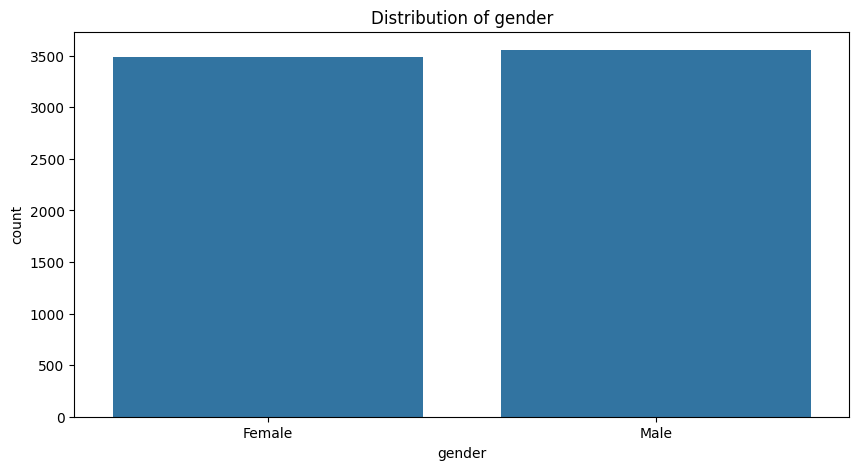

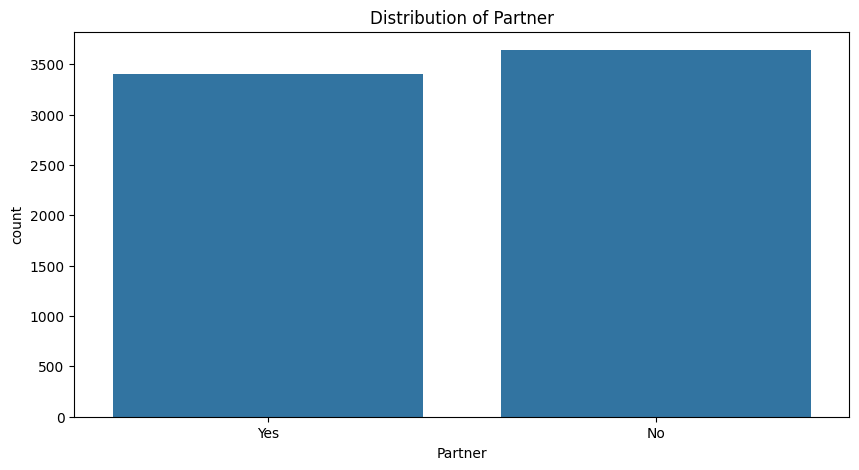

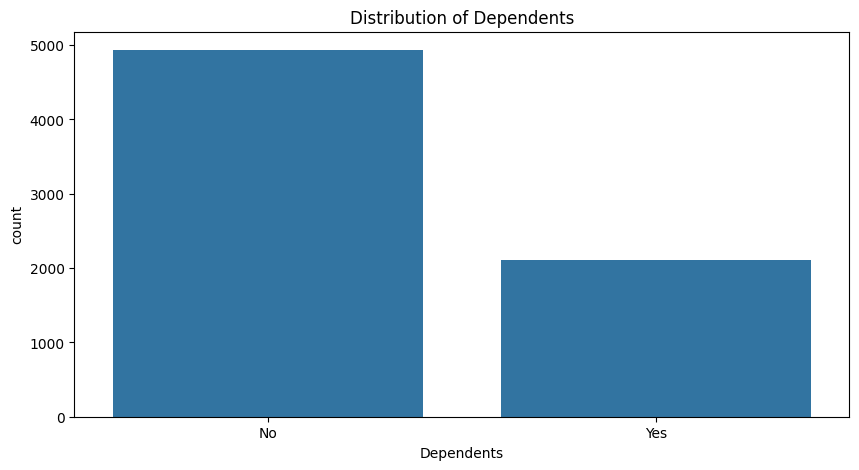

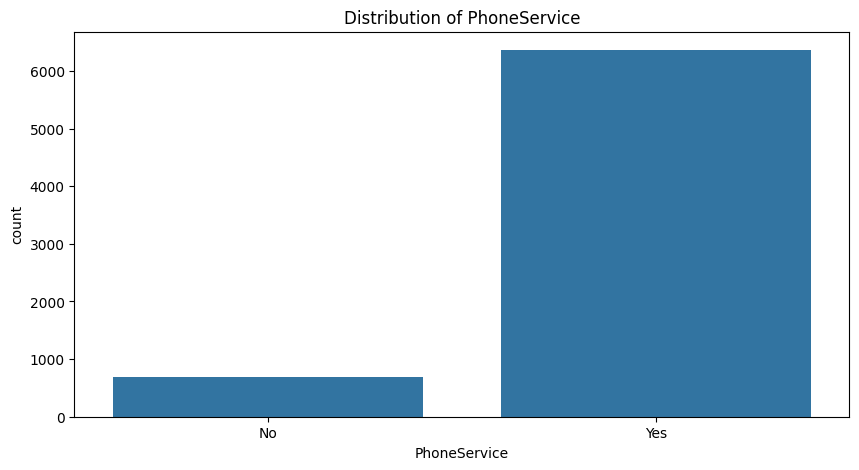

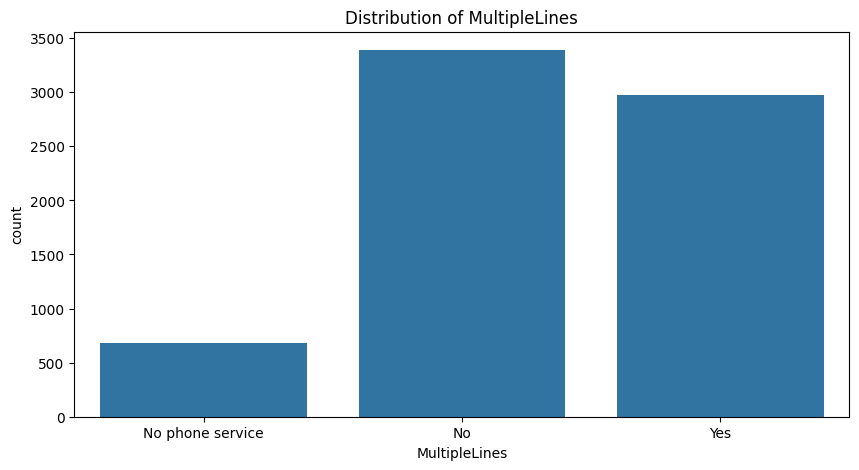

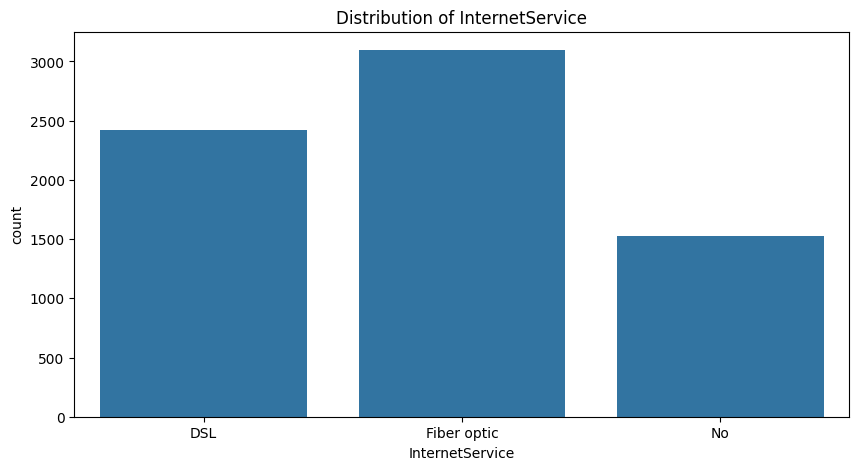

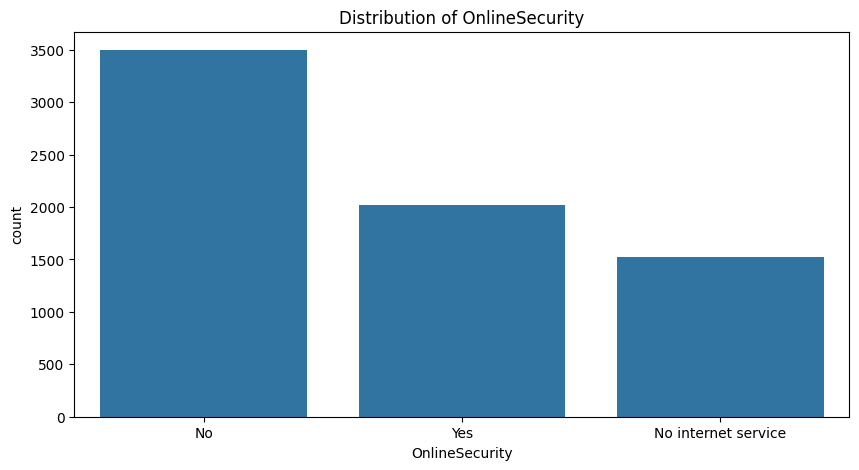

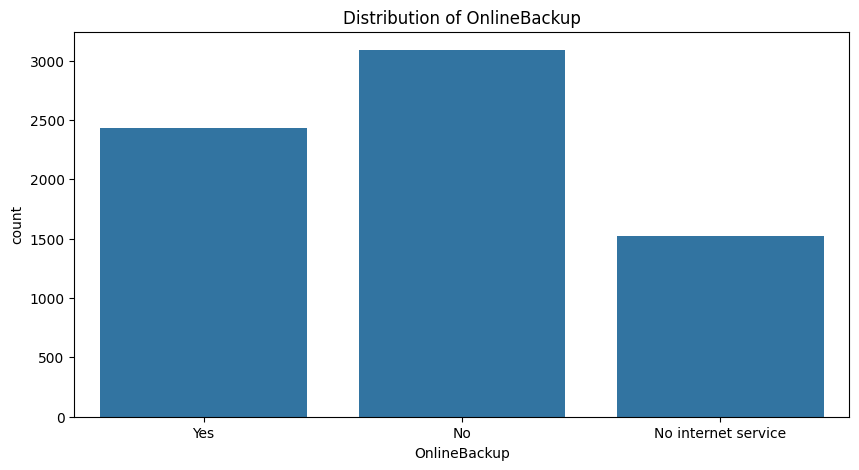

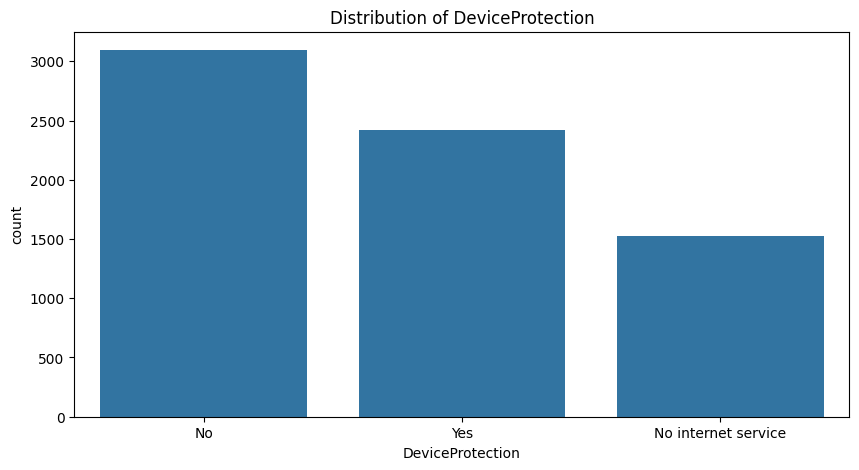

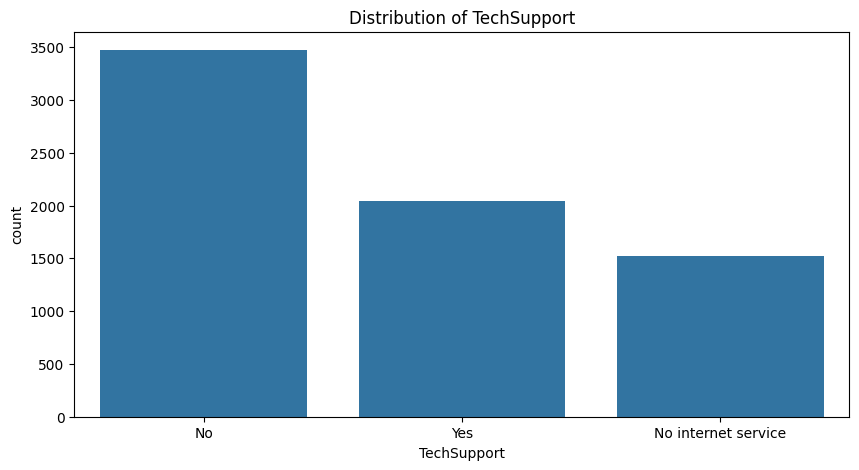

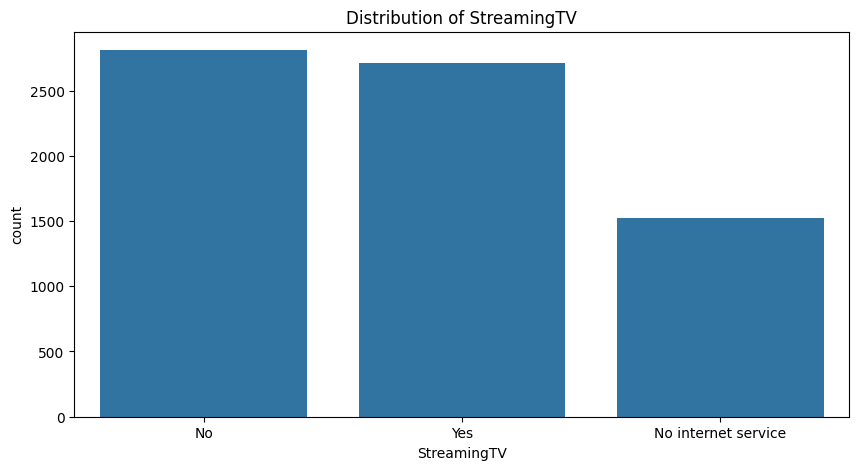

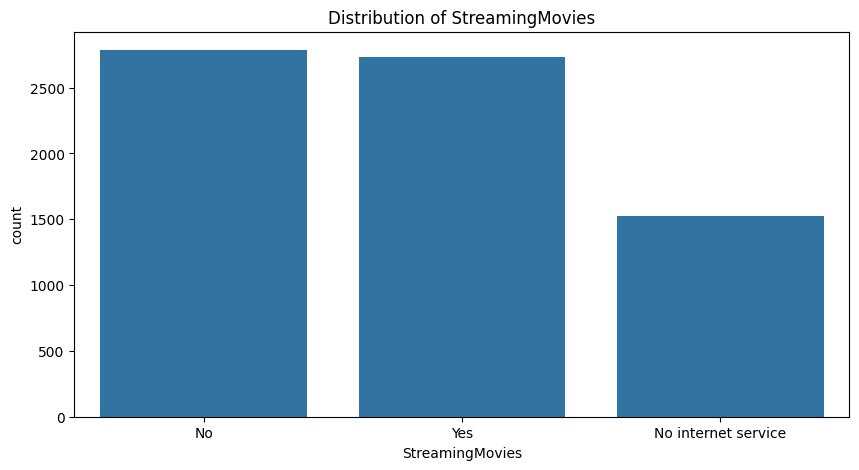

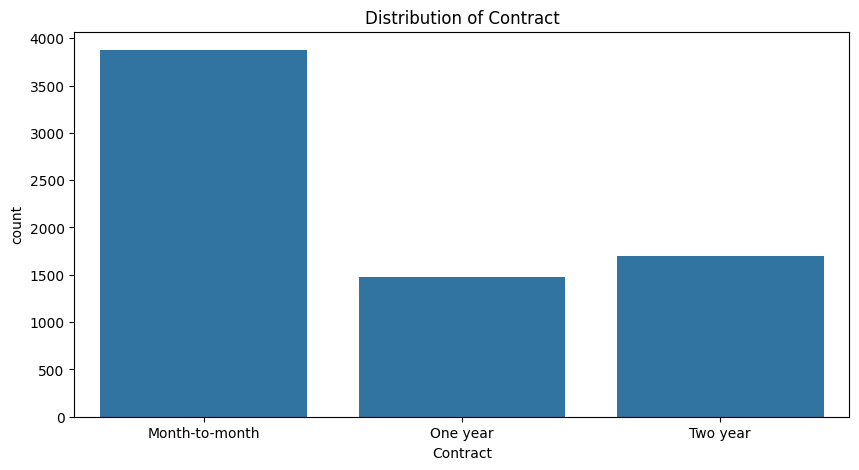

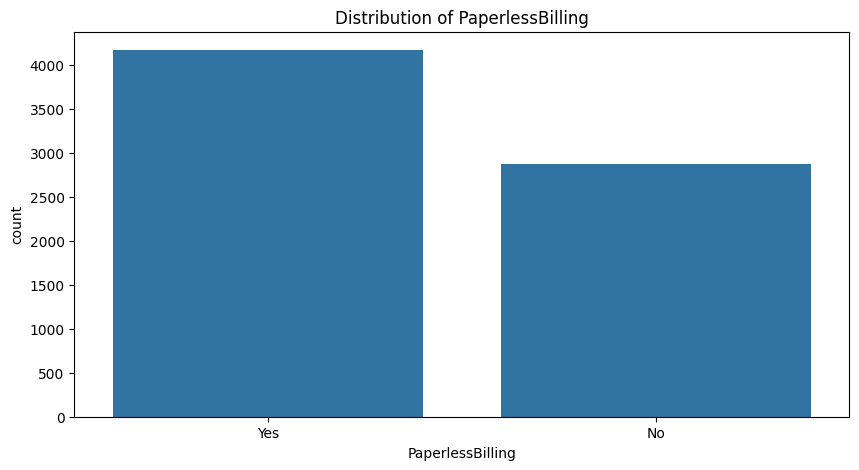

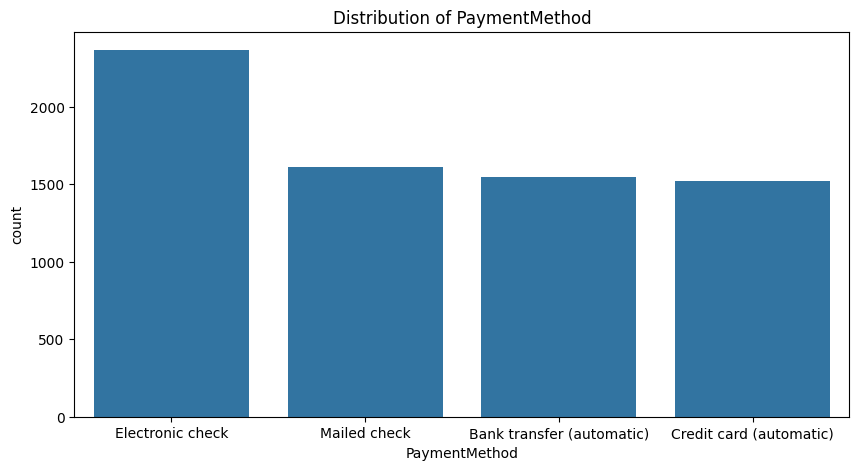

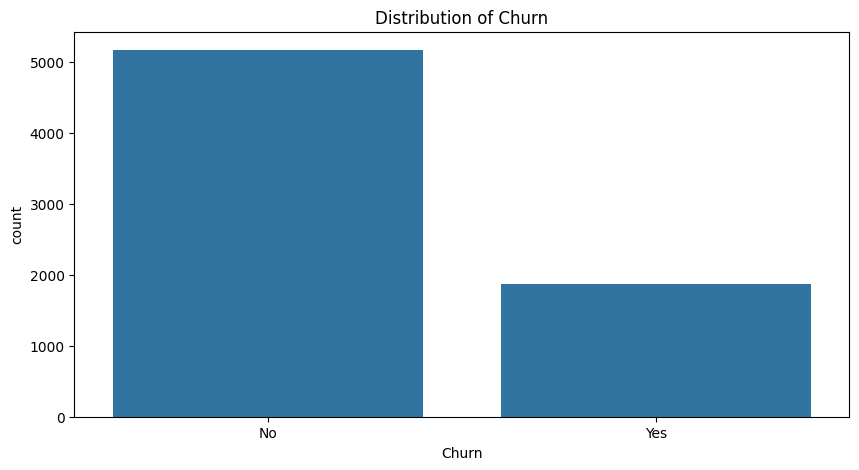

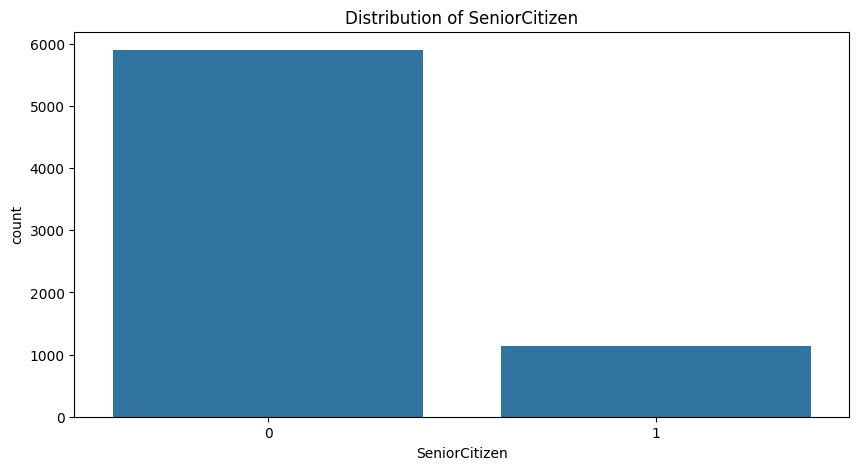

In [27]:
for col in obj_cols:
  plt.figure(figsize=(10,5))
  sns.countplot(x=df[col])
  plt.title(f"Distribution of {col}")
  plt.show()

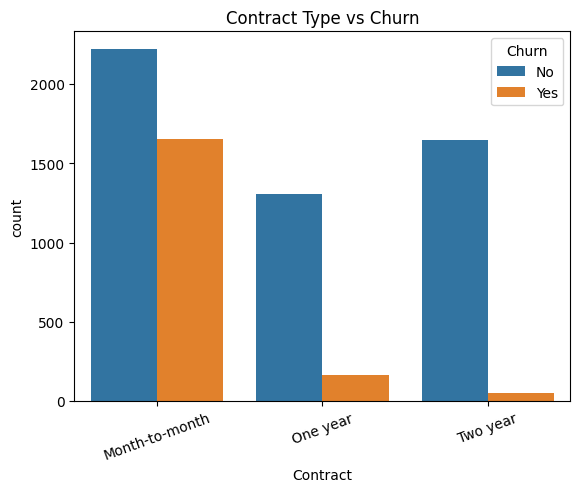

In [28]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=20)
plt.show()

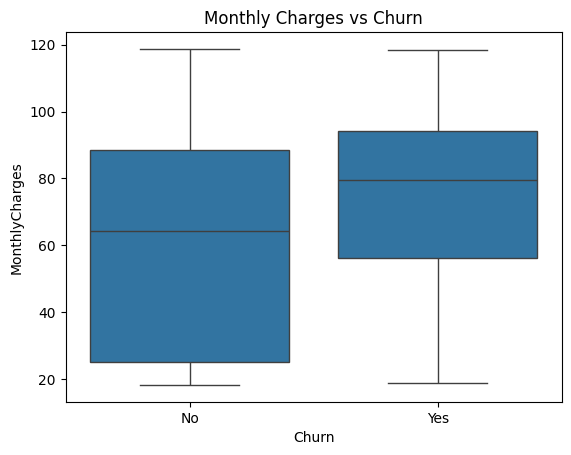

In [29]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title("Monthly Charges vs Churn")
plt.show()

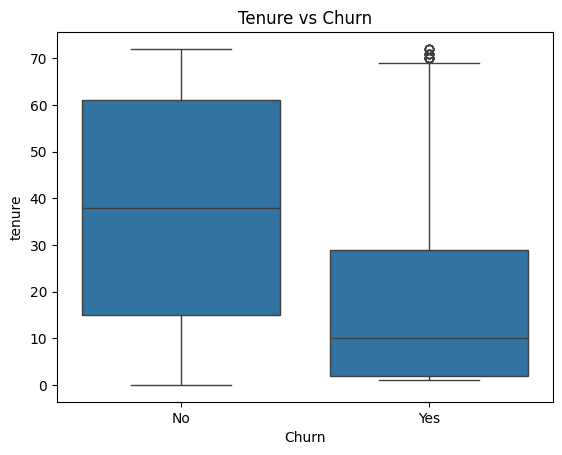

In [30]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title("Tenure vs Churn")
plt.show()

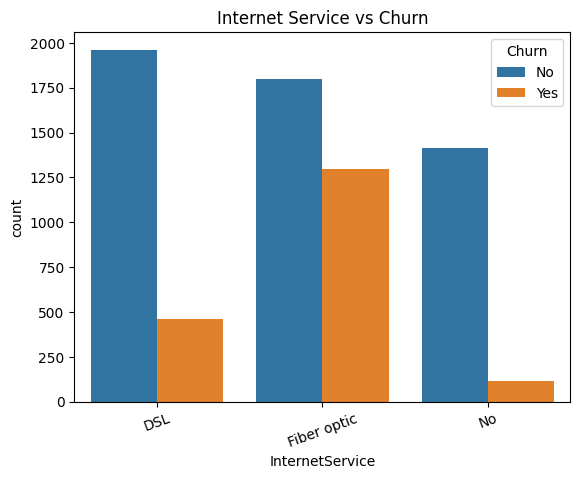

In [31]:
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Internet Service vs Churn")
plt.xticks(rotation=20)
plt.show()

In [32]:
df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
No,73.463013
Yes,26.536987


In [33]:
num_col_list = ["tenure","MonthlyCharges","TotalCharges"]

for col in df.columns:
    if col not in num_col_list:
      print(col,df[col].unique())
      print("-"*50)

gender ['Female' 'Male']
--------------------------------------------------
SeniorCitizen [0 1]
--------------------------------------------------
Partner ['Yes' 'No']
--------------------------------------------------
Dependents ['No' 'Yes']
--------------------------------------------------
PhoneService ['No' 'Yes']
--------------------------------------------------
MultipleLines ['No phone service' 'No' 'Yes']
--------------------------------------------------
InternetService ['DSL' 'Fiber optic' 'No']
--------------------------------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
--------------------------------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
--------------------------------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
--------------------------------------------------
TechSupport ['No' 'Yes' 'No internet service']
--------------------------------------------------
StreamingTV ['No' 'Yes' 'No internet 

In [34]:
binary_cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in binary_cols:
    df[col] = df[col].map({'Yes':1,'No':0})

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   object 


In [36]:
df = pd.get_dummies(df, drop_first=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   Partner                                7043 non-null   int64  
 2   Dependents                             7043 non-null   int64  
 3   tenure                                 7043 non-null   int64  
 4   PhoneService                           7043 non-null   int64  
 5   PaperlessBilling                       7043 non-null   int64  
 6   MonthlyCharges                         7043 non-null   float64
 7   TotalCharges                           7043 non-null   float64
 8   Churn                                  7043 non-null   int64  
 9   gender_Male                            7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

In [38]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [39]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, stratify=y, random_state=42)

In [40]:
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, stratify=y_temp, random_state=42)

In [41]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [42]:
y_val_pred = rf.predict(X_val)

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

[[680  96]
 [141 139]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       776
           1       0.59      0.50      0.54       280

    accuracy                           0.78      1056
   macro avg       0.71      0.69      0.70      1056
weighted avg       0.77      0.78      0.77      1056



In [44]:
proba = rf.predict_proba(X_val)[:,1]

In [45]:
thresholds = np.linspace(0, 1, 200)

precisions = []
recalls = []

for t in thresholds:
    preds = (proba >= t).astype(int)
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

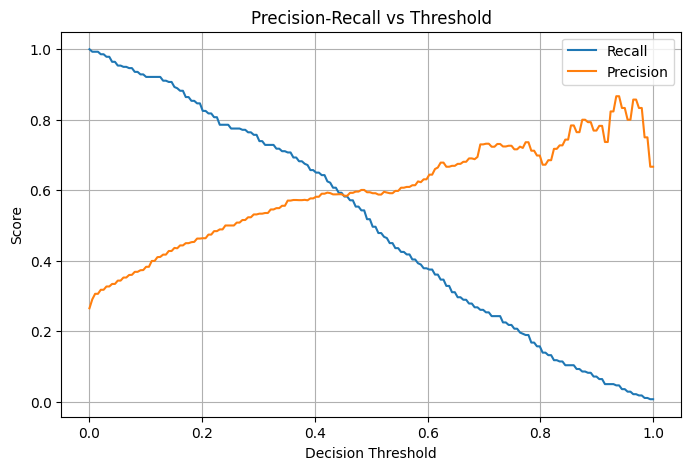

In [46]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid()
plt.show()

In [47]:
threshold = 0.32

y_val_new = (proba >= threshold).astype(int)

In [48]:
print("New Threshold:", threshold)
print(confusion_matrix(y_val, y_val_new))
print(classification_report(y_val, y_val_new))

New Threshold: 0.32
[[599 177]
 [ 76 204]]
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       776
           1       0.54      0.73      0.62       280

    accuracy                           0.76      1056
   macro avg       0.71      0.75      0.72      1056
weighted avg       0.79      0.76      0.77      1056



In [49]:
test_proba = rf.predict_proba(X_test)[:,1]
y_test_pred = (test_proba >= 0.32).astype(int)
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

[[602 174]
 [ 84 197]]
              precision    recall  f1-score   support

           0       0.88      0.78      0.82       776
           1       0.53      0.70      0.60       281

    accuracy                           0.76      1057
   macro avg       0.70      0.74      0.71      1057
weighted avg       0.79      0.76      0.77      1057



In [50]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, ...)

In [51]:
val_proba_xgb = xgb.predict_proba(X_val)[:,1]
val_pred_xgb = (val_proba_xgb >= 0.5).astype(int)
print(confusion_matrix(y_val, val_pred_xgb))
print(classification_report(y_val, val_pred_xgb))

[[688  88]
 [133 147]]
              precision    recall  f1-score   support

           0       0.84      0.89      0.86       776
           1       0.63      0.53      0.57       280

    accuracy                           0.79      1056
   macro avg       0.73      0.71      0.72      1056
weighted avg       0.78      0.79      0.78      1056



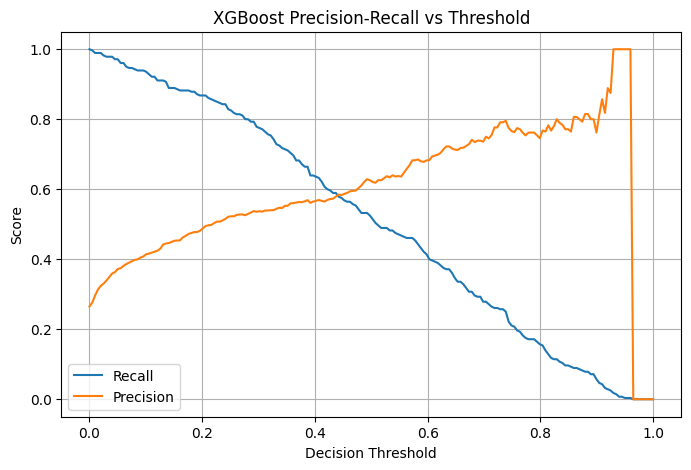

In [52]:
proba = val_proba_xgb

# thresholds
thresholds = np.linspace(0, 1, 200)

precisions = []
recalls = []

for t in thresholds:
    preds = (proba >= t).astype(int)
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

# plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("XGBoost Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [53]:
threshold = 0.30

test_proba_xgb = xgb.predict_proba(X_test)[:,1]
y_test_pred_xgb = (test_proba_xgb >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Threshold:", threshold)
print(confusion_matrix(y_test, y_test_pred_xgb))
print(classification_report(y_test, y_test_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_test_pred_xgb))

Threshold: 0.3
[[597 179]
 [ 82 199]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       776
           1       0.53      0.71      0.60       281

    accuracy                           0.75      1057
   macro avg       0.70      0.74      0.71      1057
weighted avg       0.79      0.75      0.76      1057

Accuracy: 0.7530747398297067


In [54]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_s = scaler.fit_transform(X_train)
X_val_s = scaler.transform(X_val)
X_test_s = scaler.transform(X_test)

In [55]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [56]:
model = models.Sequential([

    layers.Dense(64, activation='relu', input_shape=(X_train_s.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(32, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(16, activation='relu'),

    layers.Dense(1, activation='sigmoid')
])

In [57]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [58]:
history = model.fit(
    X_train_s, y_train,
    validation_data=(X_val_s, y_val),
    epochs=50,
    batch_size=64
)

Epoch 1/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6965 - loss: 0.5976 - val_accuracy: 0.7708 - val_loss: 0.4923
Epoch 2/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7773 - loss: 0.4791 - val_accuracy: 0.7869 - val_loss: 0.4528
Epoch 3/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7951 - loss: 0.4484 - val_accuracy: 0.7926 - val_loss: 0.4387
Epoch 4/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7893 - loss: 0.4345 - val_accuracy: 0.7917 - val_loss: 0.4361
Epoch 5/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7907 - loss: 0.4387 - val_accuracy: 0.7945 - val_loss: 0.4342
Epoch 6/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7895 - loss: 0.4536 - val_accuracy: 0.7955 - val_loss: 0.4309
Epoch 7/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7815 - loss: 0.4519 - val_accuracy: 0.7936 - val_loss: 0.4293
Epoch 8/50
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7955 - loss: 0.4285 - val_accuracy: 0.8002 - val_loss

In [59]:
val_proba_nn = model.predict(X_val_s).flatten()

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step  


In [60]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

val_pred_nn = (val_proba_nn >= 0.5).astype(int)

print(confusion_matrix(y_val, val_pred_nn))
print(classification_report(y_val, val_pred_nn))

[[666 110]
 [109 171]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       776
           1       0.61      0.61      0.61       280

    accuracy                           0.79      1056
   macro avg       0.73      0.73      0.73      1056
weighted avg       0.79      0.79      0.79      1056



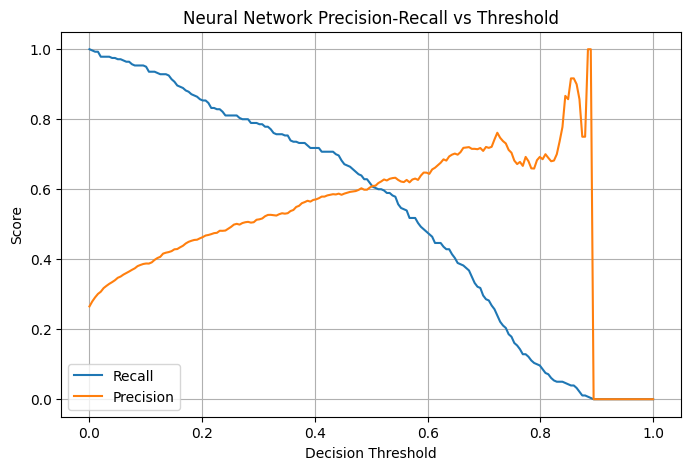

In [61]:
# use NN probabilities
proba = val_proba_nn

# thresholds
thresholds = np.linspace(0, 1, 200)

precisions = []
recalls = []

for t in thresholds:
    preds = (proba >= t).astype(int)
    precisions.append(precision_score(y_val, preds))
    recalls.append(recall_score(y_val, preds))

# plot
plt.figure(figsize=(8,5))
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, precisions, label="Precision")

plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Neural Network Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

In [62]:
threshold = 0.32

test_proba_nn = model.predict(X_test_s).flatten()
y_test_pred_nn = (test_proba_nn >= threshold).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Threshold:", threshold)
print(confusion_matrix(y_test, y_test_pred_nn))
print(classification_report(y_test, y_test_pred_nn))
print("Accuracy:", accuracy_score(y_test, y_test_pred_nn))

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Threshold: 0.32
[[596 180]
 [ 79 202]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82       776
           1       0.53      0.72      0.61       281

    accuracy                           0.75      1057
   macro avg       0.71      0.74      0.72      1057
weighted avg       0.79      0.75      0.77      1057

Accuracy: 0.7549668874172185


In [64]:
# ----- Neural Network builder -----
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score

def build_nn(input_dim):
    model = models.Sequential([
        layers.Dense(64, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(16, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                  loss='binary_crossentropy')
    return model


# ----- Data -----
X_np = X.values
y_np = y.values

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_results, xgb_results, nn_results = [], [], []

# ----- CV LOOP -----
for fold, (train_idx, val_idx) in enumerate(kf.split(X_np, y_np), 1):

    print(f"\nFold {fold}")

    X_train_cv, X_val_cv = X_np[train_idx], X_np[val_idx]
    y_train_cv, y_val_cv = y_np[train_idx], y_np[val_idx]

    # ================= RANDOM FOREST =================
    rf = RandomForestClassifier(n_estimators=300, random_state=42)
    rf.fit(X_train_cv, y_train_cv)

    rf_proba = rf.predict_proba(X_val_cv)[:,1]
    rf_pred = (rf_proba >= 0.30).astype(int)

    rf_metrics = [
        accuracy_score(y_val_cv, rf_pred),
        precision_score(y_val_cv, rf_pred),
        recall_score(y_val_cv, rf_pred),
        average_precision_score(y_val_cv, rf_proba)
    ]
    rf_results.append(rf_metrics)

    # ================= XGBOOST =================
    xgb = XGBClassifier(
        n_estimators=400,
        learning_rate=0.05,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        eval_metric='logloss',
        random_state=42
    )

    xgb.fit(X_train_cv, y_train_cv)

    xgb_proba = xgb.predict_proba(X_val_cv)[:,1]
    xgb_pred = (xgb_proba >= 0.30).astype(int)

    xgb_metrics = [
        accuracy_score(y_val_cv, xgb_pred),
        precision_score(y_val_cv, xgb_pred),
        recall_score(y_val_cv, xgb_pred),
        average_precision_score(y_val_cv, xgb_proba)
    ]
    xgb_results.append(xgb_metrics)

    # ================= NEURAL NETWORK =================
    scaler = StandardScaler()
    X_train_s = scaler.fit_transform(X_train_cv)
    X_val_s = scaler.transform(X_val_cv)

    nn = build_nn(X_train_s.shape[1])
    nn.fit(X_train_s, y_train_cv, epochs=25, batch_size=64, verbose=0)

    nn_proba = nn.predict(X_val_s, verbose=0).flatten()
    nn_pred = (nn_proba >= 0.32).astype(int)

    nn_metrics = [
        accuracy_score(y_val_cv, nn_pred),
        precision_score(y_val_cv, nn_pred),
        recall_score(y_val_cv, nn_pred),
        average_precision_score(y_val_cv, nn_proba)
    ]
    nn_results.append(nn_metrics)


# ----- PRINT AVERAGES -----
def print_avg(name, results):
    results = np.array(results)
    print(f"\n{name} Average Metrics:")
    print(f"Accuracy : {results[:,0].mean():.3f}")
    print(f"Precision: {results[:,1].mean():.3f}")
    print(f"Recall   : {results[:,2].mean():.3f}")
    print(f"PR-AUC   : {results[:,3].mean():.3f}")

print_avg("Random Forest", rf_results)
print_avg("XGBoost", xgb_results)
print_avg("Neural Network", nn_results)


Fold 1

Fold 2

Fold 3

Fold 4

Fold 5

Random Forest Average Metrics:
Accuracy : 0.755
Precision: 0.528
Recall   : 0.733
PR-AUC   : 0.621

XGBoost Average Metrics:
Accuracy : 0.760
Precision: 0.535
Recall   : 0.745
PR-AUC   : 0.650

Neural Network Average Metrics:
Accuracy : 0.753
Precision: 0.526
Recall   : 0.739
PR-AUC   : 0.645


In [65]:
import joblib

joblib.dump(xgb, "churn_xgb_model.pkl")
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']